## Simulating regression example

(4.8587792760014565, 14.80142786070299)

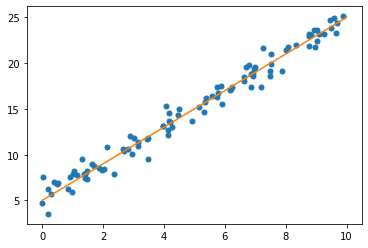

In [25]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# parameters
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)

# create x and y
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

# plot
plt.figure()
plt.plot(x, y, "o", ms = 5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx);

# mean(x), mean(y)
np.mean(x), np.mean(y)

## Computing RSS

In [12]:
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x

# compute RSS for true model
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

## Find $\beta_1$ by numerical method

Estimated slope: 2.00


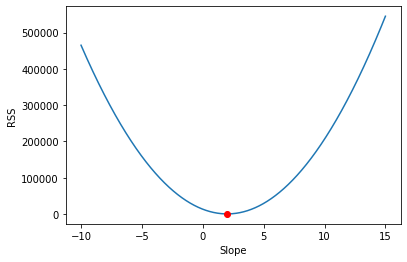

In [28]:
rss_try = []
slopes = np.arange(-10, 15, 0.001)

# try different slopes
for slope in slopes:
    rss_try.append(compute_rss(estimate_y(x, beta_0, slope), y))
    
# get slope that minimizes RSS
ind_min = np.argmin(rss_try)
est_slope = slopes[ind_min]

# plot RSS
plt.figure()
plt.plot(slopes, rss_try)
plt.plot(est_slope, rss_try[ind_min], "ro")
plt.xlabel("Slope")
plt.ylabel("RSS");

print("Estimated slope: %.2f" % est_slope)